In [25]:
using Logging
using BenchmarkTools
include("driver.jl")
include("visual.jl")

Logging.disable_logging(Logging.Warn);

Plots.AnimatedGif("C:\\Users\\ryara\\AppData\\Local\\Temp\\jl_fifgdKbG9o.gif")
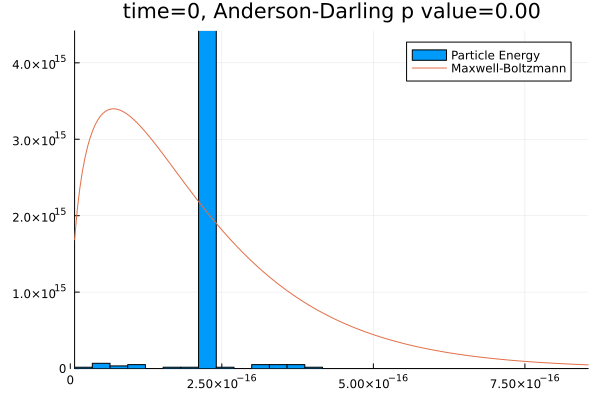

In [26]:
#Test 1 - Simple Argon Gas
L = (1.e-6, 1.e-6, 1.e-6)
Ncell = (20, 1, 1)
sys = System(L, Ncell, argon, 1.78, 2000, 400.)
samp = simulate_dsmc(sys=sys, Nsteps=2000, Nsample=100)
display(plot_thermalization(samp))

In [27]:
#Test 2 - Simple Argon Gas Runtime
L = (1.e-6, 1.e-6, 1.e-6)
Ncell = (20, 1, 1)

#run first time to compile
sys = System(L, Ncell, argon, 1.78, 2000, 400.)
samp = simulate_dsmc(sys=sys, Nsteps=2000, Nsample=100)

@benchmark begin 
    sys = System($L, $Ncell, $argon, 1.78, 2000, 400.)
    samp = simulate_dsmc(sys=sys, Nsteps=2000, Nsample=100)
end